In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
city_data_df  = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)


city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789

In [27]:
city_data_df.head(10)

city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban

In [29]:
sum(city_data_df["type"]=="Rural")

18

In [35]:
merged_df = pd.merge(ride_data_df,city_data_df,how="left",on="city")
merged_df

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4               46  Urban  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[2375 rows x 6 columns]

In [78]:
bubble_size = merged_df.groupby(["city"]).mean()["driver_count"]
bubble_size

city
Amandaburgh         5.359336e+12
Barajasview         4.676968e+12
Barronchester       4.460796e+12
Bethanyland         5.842550e+12
Bradshawfurt        3.735294e+12
                        ...     
West Robert         4.575476e+12
West Samuelburgh    4.566740e+12
Williamsonville     5.079952e+12
Williamsstad        4.316939e+12
Williamsview        4.537662e+12
Name: ride_id, Length: 120, dtype: float64

In [50]:
y_axis = merged_df.groupby(["city"]).mean()["fare"]
y_axis

city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Name: fare, Length: 120, dtype: float64

In [69]:
x_axis = merged_df.groupby(["city"]).count()["ride_id"]

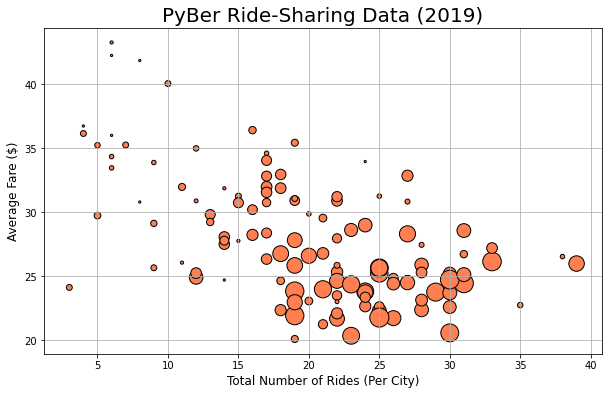

In [75]:
plt.subplots(figsize=(10, 6))
plt.scatter(x_axis,y_axis,s=bubble_size*5,c='coral',edgecolor="black", linewidths=1)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid()


In [82]:
ride_count = merged_df.groupby(["type"]).mean()["driver_count"]
ride_count

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [84]:
# Get the sum of the fares for each city type.
sum_fares_by_type = merged_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [87]:
total_fares = merged_df["fare"].sum()
total_fares

63538.64

In [88]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

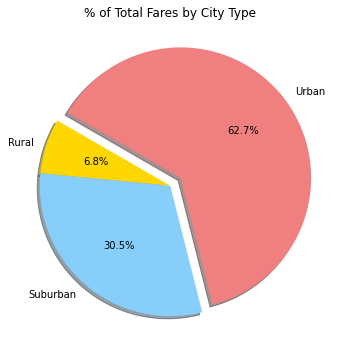

In [91]:
# Build the percentage of fares by city type pie chart.
import matplotlib as mpl
plt.subplots(figsize=(10, 6))

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

# Show Figure
plt.show()

In [93]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * merged_df.groupby(["type"]).count()["ride_id"] / merged_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

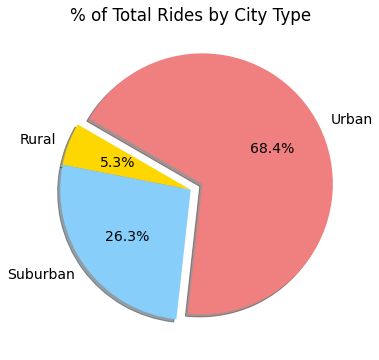

In [95]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Show Figure
plt.show()